# Dados de Roubos de Celulares (SP - 2021 a 2022)

## Importação das bibliotecas e base de dados

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import missingno as msno

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Aulas/TCC/roubo-celulares.csv', low_memory=False)

In [ ]:
df.shape

(110156, 54)

## Análise de dados vazios

In [ ]:
df_na_perc = df[df.columns[df.isna().any()]].isna().sum() * 100 / df.shape[0]

### Colunas muito vazias (maior que 50%) e suas porcentagens

<AxesSubplot:>

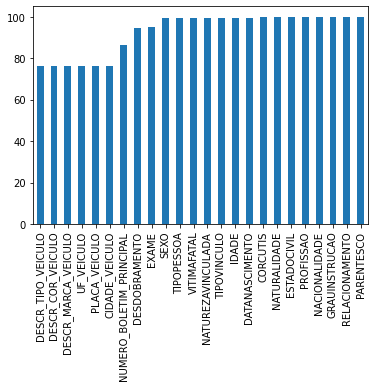

In [ ]:
df_na_perc[df_na_perc >= 50].sort_values().plot(kind="bar")

### Colunas pouco vazias (menor que 50%) e suas porcentagens

<AxesSubplot:>

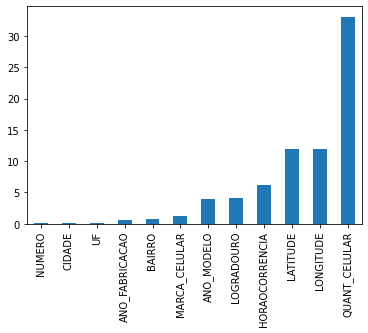

In [ ]:
df_na_perc[df_na_perc < 50].sort_values().plot(kind="bar")

## Dados de localização 

### Top 10 Cidades com maior ocorrência dos roubos

<AxesSubplot:>

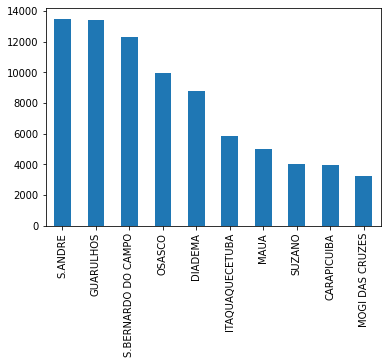

In [ ]:
df['CIDADE'].value_counts().head(10).plot(kind="bar")

### Top 10 Bairros com maior ocorrência dos roubos

<AxesSubplot:>

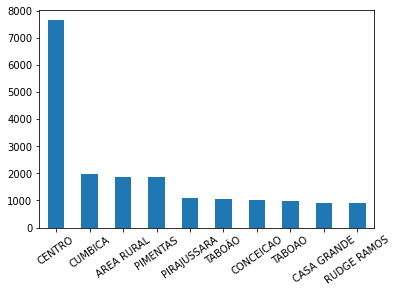

In [ ]:
df['BAIRRO'].str.upper().value_counts().head(10).plot(kind="bar", rot=35)

### Top 6 descrições de locais com maior ocorrência dos roubos

<AxesSubplot:>

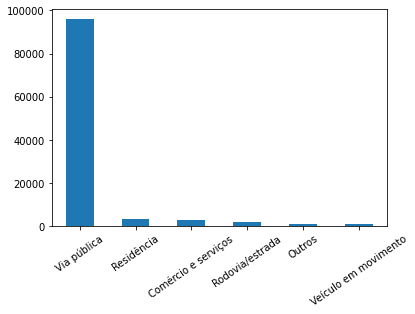

In [ ]:
df['DESCRICAOLOCAL'].str.capitalize().value_counts().head(6).plot(kind="bar", rot=35)

## Dados temporais

### Tempo de ocorrência dos roubos

<AxesSubplot:>

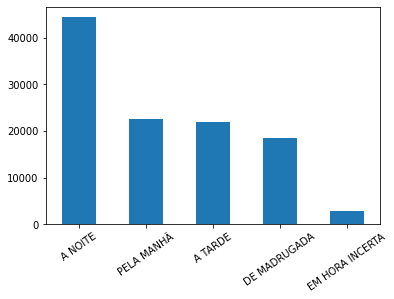

In [ ]:
df['PERIDOOCORRENCIA'].value_counts().plot(kind="bar", rot=35)

### Ano de registro das ocorrências

<AxesSubplot:>

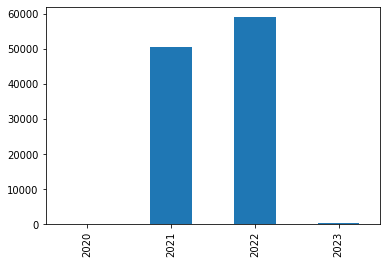

In [ ]:
df['ANO_BO'].value_counts().sort_index().plot(kind="bar")

### Meses com maior registro das ocorrências

<AxesSubplot:>

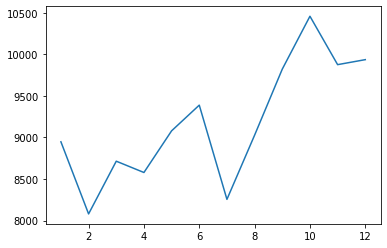

In [ ]:
#df[df['DATAOCORRENCIA'].str.contains('2020|2021|2022|2023') != True]
pd.DatetimeIndex(df['DATACOMUNICACAO']).month.value_counts().sort_index().plot(kind="line")

## Dados gerais dos roubos

### Distribuição se ocorrências em flagrante

<AxesSubplot:>

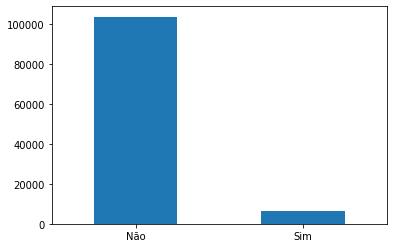

In [ ]:
df['FLAGRANTE'].value_counts().plot(kind="bar", rot=0)

### Top 6 marcas de celulares nas ocorrências registradas

<AxesSubplot:>

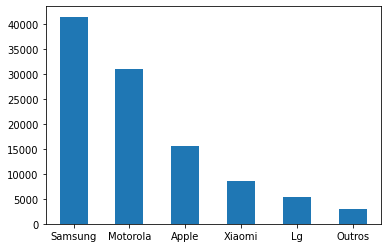

In [ ]:
df['MARCA_CELULAR'].str.capitalize().value_counts().head(6).plot(kind="bar", rot=0)

### Top 10 anos (de celulares ou dos veículos?) das ocorrências

<AxesSubplot:>

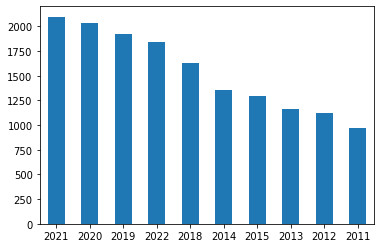

In [ ]:
df["ANO_MODELO"].dropna().loc[lambda x : x > 0].map(lambda x: int(x)).value_counts().head(10).plot(kind="bar", rot=0)

### Top 7 delegacias registradas nas ocorrências

<AxesSubplot:>

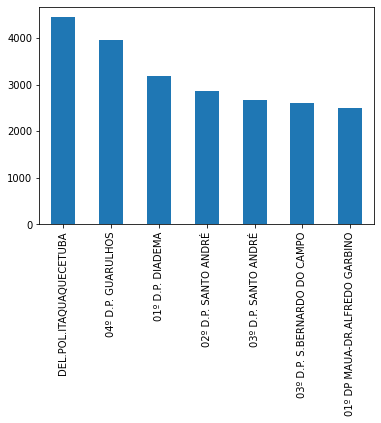

In [ ]:
df['DELEGACIA_CIRCUNSCRICAO'].value_counts().head(7).plot(kind="bar")

### Top 7 departamentos registrados nas ocorrências

<AxesSubplot:>

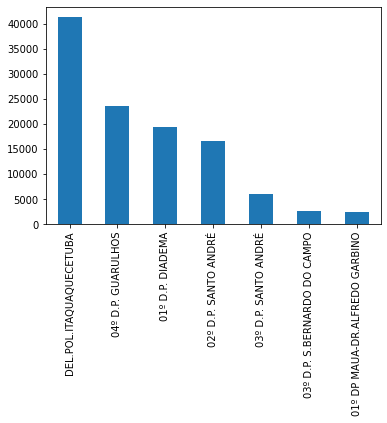

In [ ]:
df['SOLUCAO'].value_counts().head(7).plot(kind="bar")

### Descrição das idades e quantidades de celulares envolvidas nas ocorrências

In [ ]:
df[['IDADE', 'QUANT_CELULAR']].describe()

,IDADE,QUANT_CELULAR
count,352.000000,73742.000000
mean,28.363636,1.175355
std,11.267715,9.217678
min,13.000000,0.000000
25%,22.000000,1.000000
50%,27.000000,1.000000
75%,31.250000,1.000000
max,75.000000,1000.000000
